# Libraries used

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and understanding the DF
- We have a train and test csv for comparason and also a reference for how it should look at the end (sample_submission)

In [56]:
df_train = pd.read_csv('csvs/train.csv') 
df_test = pd.read_csv('csvs/test.csv')
sample_submission = pd.read_csv('csvs/sample_submission.csv')

In [58]:
df_train.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [60]:
df_test.head(5)

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [70]:
shape1 = df_train.shape
shape2 = df_test.shape
print(shape1)
print(shape2)

(913000, 4)
(45000, 4)


Difference, test doesn't have 'Sales' column and train does it 

# Preprocessing and cleaning data
- Make sure the columns are standardize
- Missing values/dups
- Decided to split date in day, month and year but keeping date as a whole
- Outliers

## Cleaning 

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [82]:
df_train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

No missing values to handle

In [90]:
df_train.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

We will be extracting a bit more in the date column, meaning we will be having a column for day, month, year and the normal data but as in date formate in case we would like to be more specific with out finding 

In [96]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [98]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

In [100]:
df_train.head(10)

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
5,2013-01-06,1,1,12,2013,1,6
6,2013-01-07,1,1,10,2013,1,7
7,2013-01-08,1,1,9,2013,1,8
8,2013-01-09,1,1,12,2013,1,9
9,2013-01-10,1,1,9,2013,1,10


In [110]:
df_train.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
912995    False
912996    False
912997    False
912998    False
912999    False
Length: 913000, dtype: bool>

The data seems to be pretty clean from the get go.

## Outliers

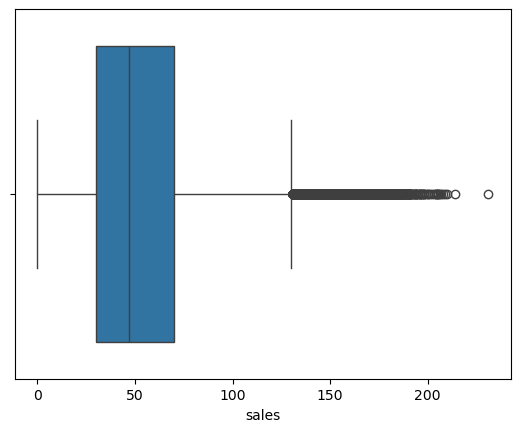

In [119]:
sns.boxplot(x=df_train['sales'])
plt.show()

Why only checking outliers in 'Sales' our df is not as big in columns, date, id, store this columns wouldn't make sense to check outliers, even in 'Sales' you could argue maybe you shouldn't see the outliers since per the df readme says 'sales - Number of items sold at a particular store on a particular date.' But just to make sure there is nothing crazy we will take a look and since it's pretty difficult to see how many are outliers we will use the IQR.


In [129]:
Q1 = df_train['sales'].quantile(0.25)
Q3 = df_train['sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_train[(df_train['sales'] < lower_bound) | (df_train['sales'] > upper_bound)]

num_outliers_iqr = outliers_iqr.shape[0]
print(f"There is {num_outliers_iqr} outliers")

There is 11967 outliers


This looks like a big number but compare to our shape(913000, 4), 11967 represent less than 5% of the data, in which case I would argue we should alter 

## Doing same, cleaning and preprocessing to test

In [134]:
df_test['date'] = pd.to_datetime(df_test['date'])

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

df_test.head()

,id,date,store,item,year,month,day
0,0,2018-01-01,1,1,2018,1,1
1,1,2018-01-02,1,1,2018,1,2
2,2,2018-01-03,1,1,2018,1,3
3,3,2018-01-04,1,1,2018,1,4
4,4,2018-01-05,1,1,2018,1,5


In [ ]:
df_train.to_csv("df_train.csv", index=False)
df_test.to_csv("df_test.csv", index=False)